<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/FFT_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

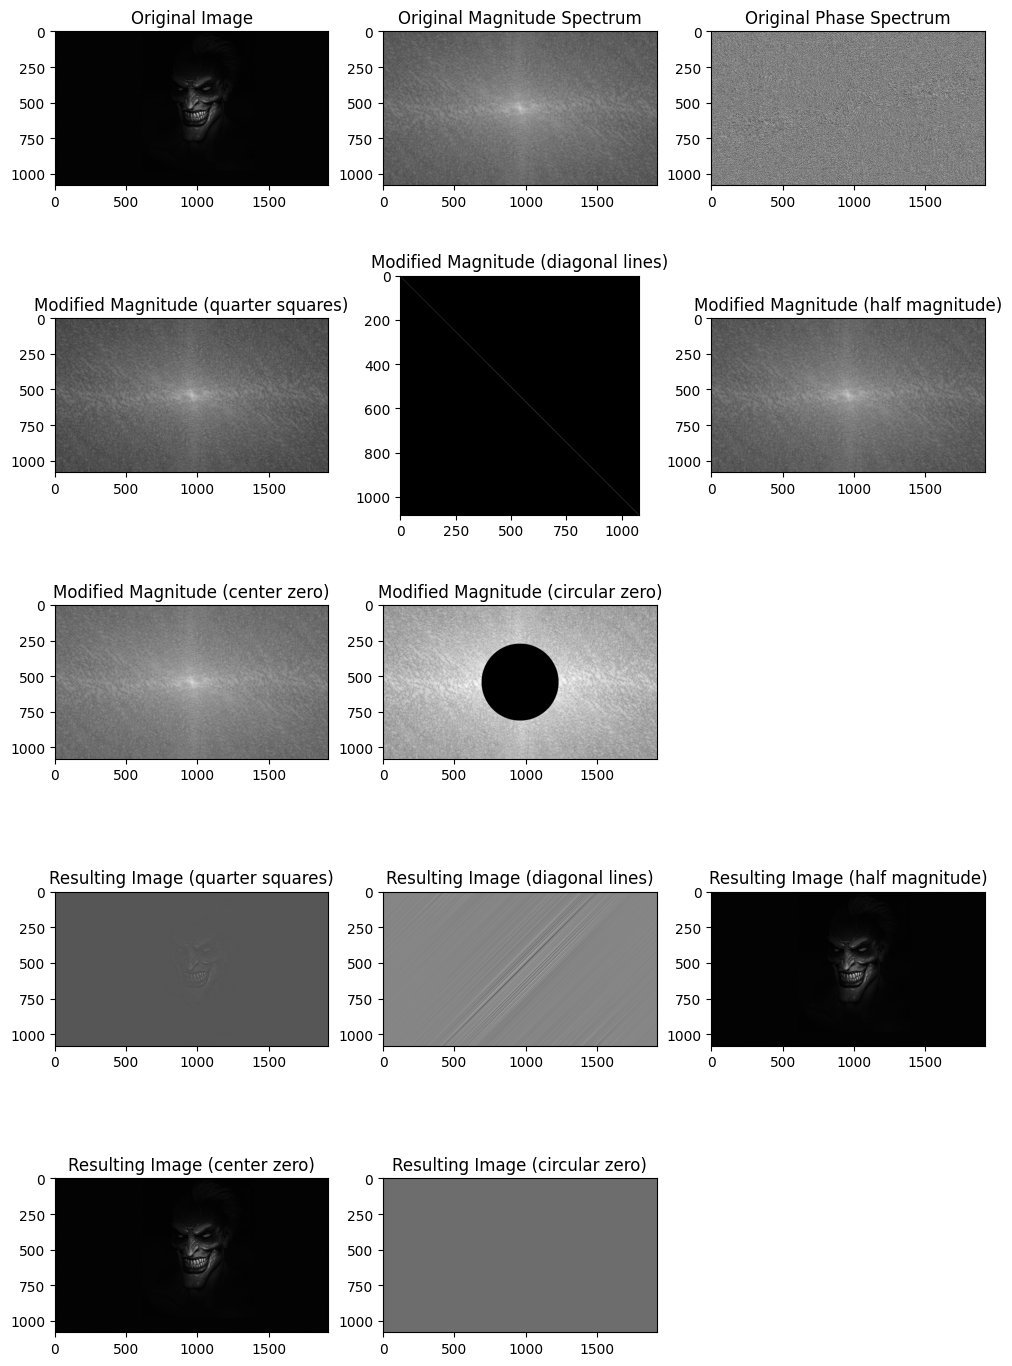

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to modify the magnitude spectrum
def modify_magnitude(magnitude_spectrum, change):
    if change == 'quarter squares':
        modified_magnitude = np.sqrt(magnitude_spectrum) / 2
    elif change == 'diagonal lines':
        modified_magnitude = np.diag(np.diag(magnitude_spectrum))
    elif change == 'half magnitude':
        modified_magnitude = magnitude_spectrum / 2
    elif change == 'center zero':
        modified_magnitude = np.copy(magnitude_spectrum)
        modified_magnitude[magnitude_spectrum.shape[0] // 2, magnitude_spectrum.shape[1] // 2] = 0
    elif change == 'circular zero':
        x_center, y_center = magnitude_spectrum.shape[0] // 2, magnitude_spectrum.shape[1] // 2
        radius = min(x_center, y_center) // 2
        y, x = np.ogrid[-x_center:magnitude_spectrum.shape[0] - x_center, -y_center:magnitude_spectrum.shape[1] - y_center]
        mask = x**2 + y**2 <= radius**2
        modified_magnitude = np.copy(magnitude_spectrum)
        modified_magnitude[mask] = 0
    return modified_magnitude

# Function to combine modified magnitude and original phase to create resulting image
def combine_and_inverse(modified_magnitude, phase_spectrum):
    modified_magnitude_resized = cv2.resize(modified_magnitude, (phase_spectrum.shape[1], phase_spectrum.shape[0]))
    combined_spectrum = modified_magnitude_resized * np.exp(1j * phase_spectrum)
    F_combined = np.fft.ifftshift(combined_spectrum)
    image_combined = np.fft.ifft2(F_combined).real
    return image_combined

# Load the built-in image
image = cv2.imread('pepak.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to load the image.")
else:
    image = image.astype(np.float64)

    # Compute the 2D Fourier Transform of the image
    F = np.fft.fft2(image)
    F_shifted = np.fft.fftshift(F)

    # Get the magnitude and phase of the Fourier Transform
    magnitude_spectrum = np.abs(F_shifted)
    phase_spectrum = np.angle(F_shifted)

    # Create modified magnitude spectrums
    magnitude_changes = ['quarter squares', 'diagonal lines', 'half magnitude', 'center zero', 'circular zero']
    modified_magnitudes = [modify_magnitude(magnitude_spectrum, change) for change in magnitude_changes]

    # Combine each modified magnitude with the original phase and compute the resulting images
    resulting_images = [combine_and_inverse(modified_mag, phase_spectrum) for modified_mag in modified_magnitudes]

    # Plotting the results
    plt.figure(figsize=(12, 18))
    plt.subplot(5, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(5, 3, 2), plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray'), plt.title('Original Magnitude Spectrum')
    plt.subplot(5, 3, 3), plt.imshow(phase_spectrum, cmap='gray'), plt.title('Original Phase Spectrum')

    for i, change in enumerate(magnitude_changes):
        plt.subplot(5, 3, 4 + i), plt.imshow(np.log(1 + modified_magnitudes[i]), cmap='gray'), plt.title(f'Modified Magnitude ({change})')
        plt.subplot(5, 3, 10 + i), plt.imshow(resulting_images[i], cmap='gray'), plt.title(f'Resulting Image ({change})')

    plt.show()

Sure, let's break down the code line by line:

1. `import cv2`
   - This line imports the `cv2` module, which is the OpenCV library used for computer vision tasks, including image processing.

2. `import numpy as np`
   - This line imports the `numpy` library and aliases it as `np`. `numpy` is a library in Python used for numerical computations, especially with arrays and matrices.

3. `import matplotlib.pyplot as plt`
   - This line imports the `pyplot` module from `matplotlib` and aliases it as `plt`. `matplotlib` is a plotting library for creating visualizations in Python.

4. `def modify_magnitude(magnitude_spectrum, change):`
   - This line defines a Python function named `modify_magnitude` that takes two input arguments: `magnitude_spectrum` (the magnitude spectrum of an image) and `change` (a string indicating the type of modification to be applied).

5. `if change == 'quarter squares':`
   - This line checks if the value of the `change` parameter is equal to the string `'quarter squares'`. If true, it calculates a modified magnitude spectrum where each pixel value is the square root of the original magnitude divided by 2.

6. `modified_magnitude = np.sqrt(magnitude_spectrum) / 2`
   - This line computes the modified magnitude spectrum by taking the square root of the original magnitude spectrum and dividing it by 2.

7. `elif change == 'diagonal lines':`
   - This line checks if the value of the `change` parameter is equal to the string `'diagonal lines'`. If true, it calculates a modified magnitude spectrum where only the diagonal elements of the original magnitude spectrum are retained.

8. `modified_magnitude = np.diag(np.diag(magnitude_spectrum))`
   - This line computes the modified magnitude spectrum by taking the diagonal elements of the original magnitude spectrum.

9. `for i, change in enumerate(magnitude_changes):`
   - This line iterates over each index and value in the `magnitude_changes` list, using the index `i` and value `change`.

10. `plt.subplot(5, 3, 4 + i), plt.imshow(np.log(1 + modified_magnitudes[i]), cmap='gray'), plt.title(f'Modified Magnitude ({change})')`
    - This line creates a subplot in a 5x3 grid at position `4+i`, displaying the logarithmically scaled modified magnitude image using a grayscale colormap and setting the title to indicate the type of modification.

11. `plt.subplot(5, 3, 10 + i), plt.imshow(resulting_images[i], cmap='gray'), plt.title(f'Resulting Image ({change})')`
    - This line creates another subplot in the grid to display the resulting image after combining modified magnitude with the original phase spectrum.

12. `plt.show()`
    - This line displays the plot containing the modified magnitude and resulting images in separate subplots.

Overall, this code defines a function to modify the magnitude spectrum of an image based on different types of modifications and then displays the modified magnitude and resulting images in a grid of subplots using `matplotlib.pyplot`.


ok now i want change the domain for each of them

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def modify_magnitude(magnitude_spectrum, change):
    if change == 'quarter squares':
        modified_magnitude = np.sqrt(magnitude_spectrum) / 2
    elif change == 'diagonal lines':
        modified_magnitude = np.diag(np.diag(magnitude_spectrum))
    return modified_magnitude

In [6]:
image = cv2.imread('pepak.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
magnitude_spectrum = np.abs(f_transform)
phase_spectrum = np.angle(f_transform)

Original Magnitude Spectrum:
[[11305524.          4273085.8478377   3899763.86002076 ...
   3271962.45168074  3899763.86002076  4273085.8478377 ]
 [ 3128438.61976551  3101964.12490197  2827293.89397018 ...
   2215505.38016942  2588131.35545276  2912266.04152193]
 [ 1295139.01054968  1236801.65207269  1125613.49146525 ...
   1273031.05090862  1309726.19803018  1331819.66984188]
 ...
 [  457672.72410426   482758.97400106   445649.30723993 ...
    254647.2020075    294748.04815406   367781.09400714]
 [ 1295139.01054968  1331819.66984188  1309726.19803018 ...
   1003287.50942782  1125613.49146525  1236801.65207269]
 [ 3128438.61976551  2912266.04152193  2588131.35545276 ...
   2360920.07371779  2827293.89397018  3101964.12490197]]

Original Phase Spectrum:
[[ 0.          2.92601637 -0.42050067 ... -2.51242768  0.42050067
  -2.92601637]
 [-3.09075488 -0.11900367  2.85535317 ...  0.66656595 -2.67857865
   0.24407881]
 [ 0.10460545  2.99064664 -0.46069609 ... -2.44616657  0.52812566
  -2.8096

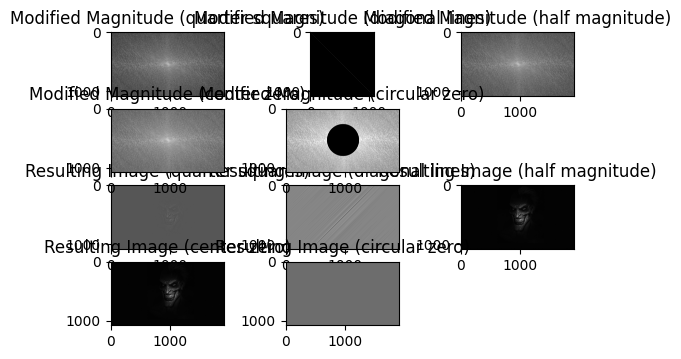

In [7]:
# Display matrices
print("Original Magnitude Spectrum:")
print(magnitude_spectrum)
print("\nOriginal Phase Spectrum:")
print(phase_spectrum)

for i, change in enumerate(magnitude_changes):
    plt.subplot(5, 3, 4 + i)
    plt.imshow(np.log(1 + modified_magnitudes[i]), cmap='gray')
    plt.title(f'Modified Magnitude ({change})')

    plt.subplot(5, 3, 10 + i)
    plt.imshow(resulting_images[i], cmap='gray')
    plt.title(f'Resulting Image ({change})')

plt.show()

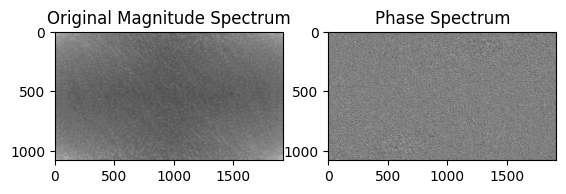

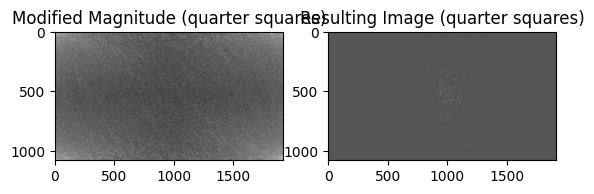

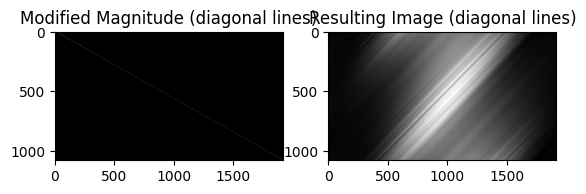

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def modify_magnitude(magnitude_spectrum, change):
    if change == 'quarter squares':
        modified_magnitude = np.sqrt(magnitude_spectrum) / 2
    elif change == 'diagonal lines':
        modified_magnitude = np.diag(np.diag(magnitude_spectrum))
    return modified_magnitude

# Load an image and compute its Fourier Transform
image = cv2.imread('pepak.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
magnitude_spectrum = np.abs(f_transform)
phase_spectrum = np.angle(f_transform)

# Display original magnitude and phase spectra
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Original Magnitude Spectrum')

plt.subplot(1, 3, 2)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')

# Modify magnitude spectrum and compute resulting images
magnitude_changes = ['quarter squares', 'diagonal lines']
modified_magnitudes = [modify_magnitude(magnitude_spectrum, change) for change in magnitude_changes]

for i, change in enumerate(magnitude_changes):
    resized_magnitude = cv2.resize(modified_magnitudes[i], (image.shape[1], image.shape[0]))
    F_combined = resized_magnitude * np.exp(1j * phase_spectrum)
    image_combined = np.fft.ifft2(F_combined).real

    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(np.log(1 + resized_magnitude), cmap='gray')
    plt.title(f'Modified Magnitude ({change})')

    plt.subplot(1, 3, 2)
    plt.imshow(image_combined, cmap='gray')
    plt.title(f'Resulting Image ({change})')

    plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [11]:
dark_image = imread('light.jpg')

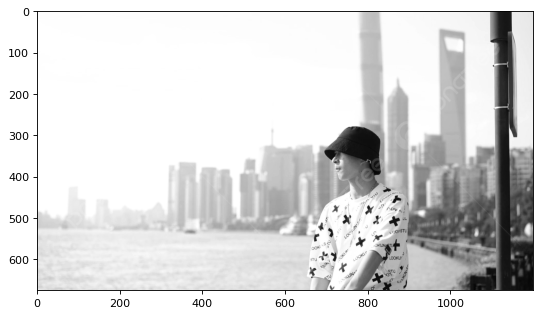

In [12]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');